In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
from torchvision.io import read_image
from tqdm.notebook import tqdm
import os
from joblib import Parallel, delayed
from utilis import readimagesize
%matplotlib inline

In [29]:
class Dataset:
    def __init__(self, pathDataset, labelFile,trainFolder,testFolder,formatImg):
        self.pathDataset = pathDataset
        self.pathLabel = os.path.join(pathDataset,labelFile)
        self.pathTrain = os.path.join(pathDataset,trainFolder)
        self.pathTest = os.path.join(pathDataset,testFolder)
        self.formatImg = formatImg

In [30]:
#dataset = Dataset("/mnt/e/DataSet/eyepacs_preprocess/","trainLabels.csv","train","","jpeg")
dataset = Dataset("/mnt/f/DataSet/DRDetectionKaggle/","trainLabels.csv","train","test","jpeg")
#dataset = Dataset("/mnt/e/DataSet/Messidor2/","messidor_dataEdited.csv","IMAGES","test","png")

In [31]:
datasetlabel = pd.read_csv(dataset.pathLabel)

datasetlabel = datasetlabel.append( pd.read_csv("/mnt/f/DataSet/DRDetectionKaggle/retinopathy_solution.csv"))
print(str(datasetlabel.count())+"Line loaded")


image    88702
level    88702
Usage    53576
dtype: int64Line loaded


In [32]:
datasetlabel.head()
datasetlabel.tail()

,image,level,Usage
53571,44346_right,0,Private
53572,44350_left,0,Private
53573,44350_right,0,Private
53574,44351_left,0,Public
53575,44351_right,0,Public


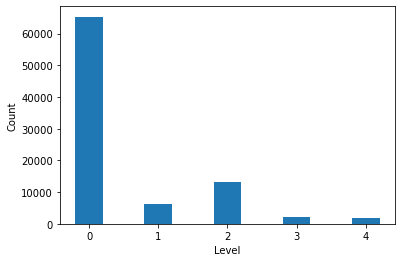

<Figure size 2400x2400 with 0 Axes>

In [36]:
fig = plt.figure()
plt.hist(datasetlabel["level"],align="left",bins= [0,1, 2, 3, 4,5],rwidth=.4)
plt.ylabel('Count')
plt.xlabel('Level')
plt.figure(figsize=(30, 30),dpi=80)
fig.savefig("HistoEyepacs.png",dpi=300,bbox_inches='tight')
plt.show()

In [84]:
def readImageSize(formatimg,data,i):
    imgname = data[i]
    if formatimg == "jpeg":
        
        if os.path.exists( os.path.join(dataset.pathDataset,dataset.pathTrain,imgname+".jpeg")):
            image = readimagesize.get_image_size(os.path.join(dataset.pathDataset,dataset.pathTrain,imgname+".jpeg"))
        else:
            image = readimagesize.get_image_size(os.path.join(dataset.pathDataset,dataset.pathTest,imgname+".jpeg"))
        return image#.size()[1:]
    else:
        if os.path.exists(os.path.join(dataset.pathDataset,dataset.pathTrain,imgname)):
            image = read_image(os.path.join(dataset.pathDataset,dataset.pathTrain,imgname))
        else:
            image = read_image(os.path.join(dataset.pathDataset,dataset.pathTest,imgname))
        return image.size()[1:]

In [85]:
imagesize=[]
data = datasetlabel["image"].unique()
imagesize = Parallel(n_jobs=16)(delayed(readImageSize)(dataset.formatImg,data,i) for i in tqdm(range(data.size)))
"""for imgs in tqdm(datasetlabel["image"]):
    image = read_image(os.path.join(dataset.pathDataset,dataset.pathTrain,imgs+".jpeg"))
    imagesize.append(image.size()[1:])"""
  

  0%|          | 0/88702 [00:00<?, ?it/s]

'for imgs in tqdm(datasetlabel["image"]):\n    image = read_image(os.path.join(dataset.pathDataset,dataset.pathTrain,imgs+".jpeg"))\n    imagesize.append(image.size()[1:])'

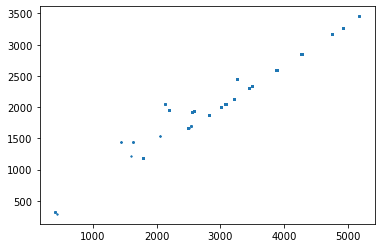

In [18]:
plt.scatter(x=[ x[0] for x in imagesize],y=[ x[1] for x in imagesize],s=1)

plt.show() 

Text(63.0, 0.5, 'Image height')

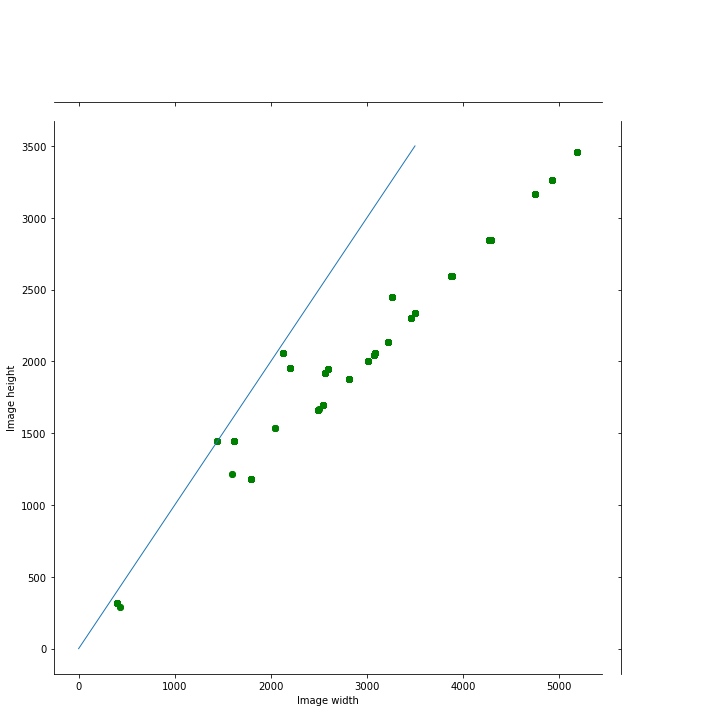

In [114]:
dataframeImagesize = pd.DataFrame(imagesize,columns={"X","Y"})

grid = sns.JointGrid(data=dataframeImagesize,x="X",y="Y",height=10)
grid.plot_joint(plt.scatter, color="g")
plt.plot([3500, 0], [3500, 0], linewidth=1)
plt.xlabel("Image width")
plt.ylabel("Image height")